# **Fiber Photometry and Optogenetic Stimulation in SN GABAergic Neurons**

This tutorial shows how to access and process data for the Hnasko Conversion Project.

This dataset contains sessions with fiber photometry recordings, optogenetic stimulation TTL signals, shock delivery TTL signals, behavioral videos, and histological verification images, along with subject and session metadata.

Contents:

- [Streaming Data](#stream-nwb)
- [Reading Data](#read-nwb)
- [Access Fiber Photometry Signal](#access-photometry)
- [Access Optogenetic and Shock TTLs](#access-ttls)
- [Access Behavioral Videos](#access-behavior) MISSING 
- [Access Histology Images](#access-histology) MISSING
- [Access Demodulated Fiber Photometry signals](#access-demod)

A schematic representation of ... : MISSING  

![Alt text](./hnasko-dataset-structure.png)  

---

# Select the subject and session to load

In [2]:
dandi_id = ""
subject_id = "C4561"
session_id = "240117-163347"

# Streaming an NWB file <a id="stream-nwb"></a>

This section demonstrates how to access the files on the [DANDI Archive](https://dandiarchive.org) without downloading them. Based on the [Streaming NWB files](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

The `dandi.dandiapi.DandiAPIClient` can be used to get the S3 URL of the NWB file stored in the DANDI Archive.

```python
from dandi.dandiapi import DandiAPIClient

session_id = "NeutralExposure"
nwbfile_path = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}.nwb"

dandiset_id = ""
with DandiAPIClient() as client:
    #This line is necessary when the dataset is in embargoed mode and only owners can view the data, once it will be published this line can be removed.
    client.dandi_authenticate() 
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(nwbfile_path)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=False)

import h5py
import remfile
from pynwb import NWBHDF5IO

file = remfile.File(s3_url)
h5_file = h5py.File(file, "r")
io = NWBHDF5IO(file=h5_file, load_namespaces=True)
```

# Reading an NWB file locally<a id="read-nwb"></a>


This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [3]:
from pynwb import NWBHDF5IO

#adapt the path
nwbfile_path = f"/Users/daphnedequatrebarbes/Documents/Catalystneuro/hnasko-lab-to-nwb/nwb_output/sub-{subject_id}_ses-{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from all_sessions.Session datajoint table.

In [4]:
nwbfile = io.read()
nwbfile

root pynwb.file.NWBFile at 0x6074686144
Fields:
  acquisition: {
    raw_modulated_signal <class 'abc.FiberPhotometryResponseSeries'>
  }
  devices: {
    Gcamp6f <class 'abc.Indicator'>,
    Tdtomato_PPN <class 'abc.Indicator'>,
    dichroic_mirror <class 'abc.DichroicMirror'>,
    excitation_source <class 'abc.ExcitationSource'>,
    excitation_source_isosbestic <class 'abc.ExcitationSource'>,
    optical_fiber <class 'abc.OpticalFiber'>,
    photodetector <class 'abc.Photodetector'>
  }
  experiment_description: Mice were freely moving on a plastic tub. Simultaneous passive optogenetic stimulation and fiber photometry recordings were conducted during the first two days. Excitatory inputs from either the STN or PPN to SN were stimulated and the activity of SN GABAergic neurons were recorded. Then mice underwent uncued electrical shocks and were recorded using fiber photometry.
  experimenter: ['Last, First Middle']
  file_create_date: [datetime.datetime(2025, 4, 23, 16, 29, 37, 146149, tzinfo=tzoffset(None, 7200))]
  identifier: f783311f-b313-46c6-b2c8-66aa6dcf8688
  institution: UC San Diego School of Medicine
  keywords: <StrDataset for HDF5 dataset "keywords": shape (3,), type "|O">
  lab: Hnasko
  lab_meta_data: {
    fiber_photometry <class 'abc.FiberPhotometry'>
  }
  ogen_sites: {
    optogenetic_stimulus_site <class 'pynwb.ogen.OptogeneticStimulusSite'>
  }
  processing: {
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: The subject is placed in a plastic tub and undergoes 3 recording sessions corresponding to a fixed duration of stimulation (i.e., 250ms, 1s, and 4s). Each session lasted 8 minutes. The subject receives optogenetic stimulation at varying frequencies (5 Hz, 10 Hz , 20 Hz and 40 Hz) 5 times for each duration with an ISI of 10s. 
  session_id: 240117-163347
  session_start_time: 2024-01-18 00:33:49.999999+00:00
  source_script: Created using NeuroConv v0.7.2
  source_script_file_name: /Users/daphnedequatrebarbes/Documents/Catalystneuro/neuroconv/src/neuroconv/basedatainterface.py
  stimulus: {
    optogenetic_series <class 'pynwb.ogen.OptogeneticSeries'>,
    optogenetic_stimulus_interval <class 'pynwb.epoch.TimeIntervals'>
  }
  subject: subject pynwb.file.Subject at 0x6075280976
Fields:
  age: P10W
  age__reference: birth
  description: Male and female were bred at University of California San Diego (UCSD) and group-housed on a 12-hour light/dark cycle, with food and water ad libitum. VGLUT2-IRES-CRE and VGAT-2A-FlpO-D knock-in mice were obtained from the Jackson Laboratory Slc17a6tm2(cre)Lowl (RRID:IMSR_JAX:016963) Slc32a1tm1.1(flpo)Hze (RRID:IMSR_JAX:029591) and maintained backcrossed on to C57BL/6J. VGlut2-Cre animals were crossed with VGAT-flp animals to generate dual transgenic animals that were VGlut2-Cre/VGAT-flp and used for experiments. All experiments were performed on animals of at least 6 weeks of age and in accordance with protocols approved by UCSD Institutional Animal Care and Use Committee.
  genotype: VGLUT2-IRES-CRE;VGAT-2A-FlpO-D
  sex: U
  species: Mus musculus
  strain: C57BL/6J
  subject_id: C4561

  surgery: Mice > 6 weeks old were anesthetized with isoflurane (4% for induction; 1-2% for maintenance). For fiber photometry experiments, mice were unilaterally injected with 300nl of AAV1-fDIO-Ef1a-Gcamp6f (4e12 vg/mL, Addgene 1283125) in SNr (AP -3.3, ML 1.3, DV -4.60) and 150nl or 200nl AAV5-DIO-Syn-ChrimsonR-Tdtomato (4e12 vg/mL or 8.5e12 vg/mL, Addgene 62723) in either STN (AP -2.00, ML 1.6, DV -4.50) or PPN (AP -4.48, ML 1.1, DV -3.75). A single photometry fiber (RWD, 400um, 0.39 NA) was implanted in SNr (AP -3.3, ML 1.4, DV -4.40), which served for optogenetic stimulation and photometry recordings. Mice were allowed to recover for 4 weeks before starting experiments.
  timestamps_reference_time: 2024-01-18 00:33:49.999999+00:00

In [5]:
nwbfile.session_start_time

datetime.datetime(2024, 1, 18, 0, 33, 49, 999999, tzinfo=tzutc())

In [6]:
nwbfile.experiment_description

'Mice were freely moving on a plastic tub. Simultaneous passive optogenetic stimulation and fiber photometry recordings were conducted during the first two days. Excitatory inputs from either the STN or PPN to SN were stimulated and the activity of SN GABAergic neurons were recorded. Then mice underwent uncued electrical shocks and were recorded using fiber photometry.'

In [7]:
nwbfile.session_description

'The subject is placed in a plastic tub and undergoes 3 recording sessions corresponding to a fixed duration of stimulation (i.e., 250ms, 1s, and 4s). Each session lasted 8 minutes. The subject receives optogenetic stimulation at varying frequencies (5 Hz, 10 Hz , 20 Hz and 40 Hz) 5 times for each duration with an ISI of 10s. '

# Access subject <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [8]:
nwbfile.subject

subject pynwb.file.Subject at 0x6075280976
Fields:
  age: P10W
  age__reference: birth
  description: Male and female were bred at University of California San Diego (UCSD) and group-housed on a 12-hour light/dark cycle, with food and water ad libitum. VGLUT2-IRES-CRE and VGAT-2A-FlpO-D knock-in mice were obtained from the Jackson Laboratory Slc17a6tm2(cre)Lowl (RRID:IMSR_JAX:016963) Slc32a1tm1.1(flpo)Hze (RRID:IMSR_JAX:029591) and maintained backcrossed on to C57BL/6J. VGlut2-Cre animals were crossed with VGAT-flp animals to generate dual transgenic animals that were VGlut2-Cre/VGAT-flp and used for experiments. All experiments were performed on animals of at least 6 weeks of age and in accordance with protocols approved by UCSD Institutional Animal Care and Use Committee.
  genotype: VGLUT2-IRES-CRE;VGAT-2A-FlpO-D
  sex: U
  species: Mus musculus
  strain: C57BL/6J
  subject_id: C4561

# Access Fiber Photometry Data <a id="access-photometry"></a>

This section demonstraces how to access the raw One Photon imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw Modulated Fiber Photometry signal 

The raw fiber photometry response data is stored in [pynwb.ophys.FiberPhotometryResponseSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.FiberPhotometryResponseSeries) object, which are added to `nwbfile.acquisition`.

The data in FiberPhotometryResponseSeries is stored as a two-dimensional array:

The first dimension corresponds to time (individual samples).
The second dimension corresponds to recorded channels.
Each row in the array represents a single time point, and each column corresponds to the signal recorded from a specific channel.



In [9]:
fiber_photometry_response_series = nwbfile.acquisition["raw_modulated_signal"]
fiber_photometry_response_series

raw_modulated_signal abc.FiberPhotometryResponseSeries at 0x6074759248
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (11475456,), type "<f4">
  description: The raw fiber photometry signal from Tucker David Technologies (TDT) acquisition system.
  fiber_photometry_table_region: fiber_photometry_table_region <class 'hdmf.common.table.DynamicTableRegion'>
  offset: 0.0
  rate: 6103.515625
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: a.u.

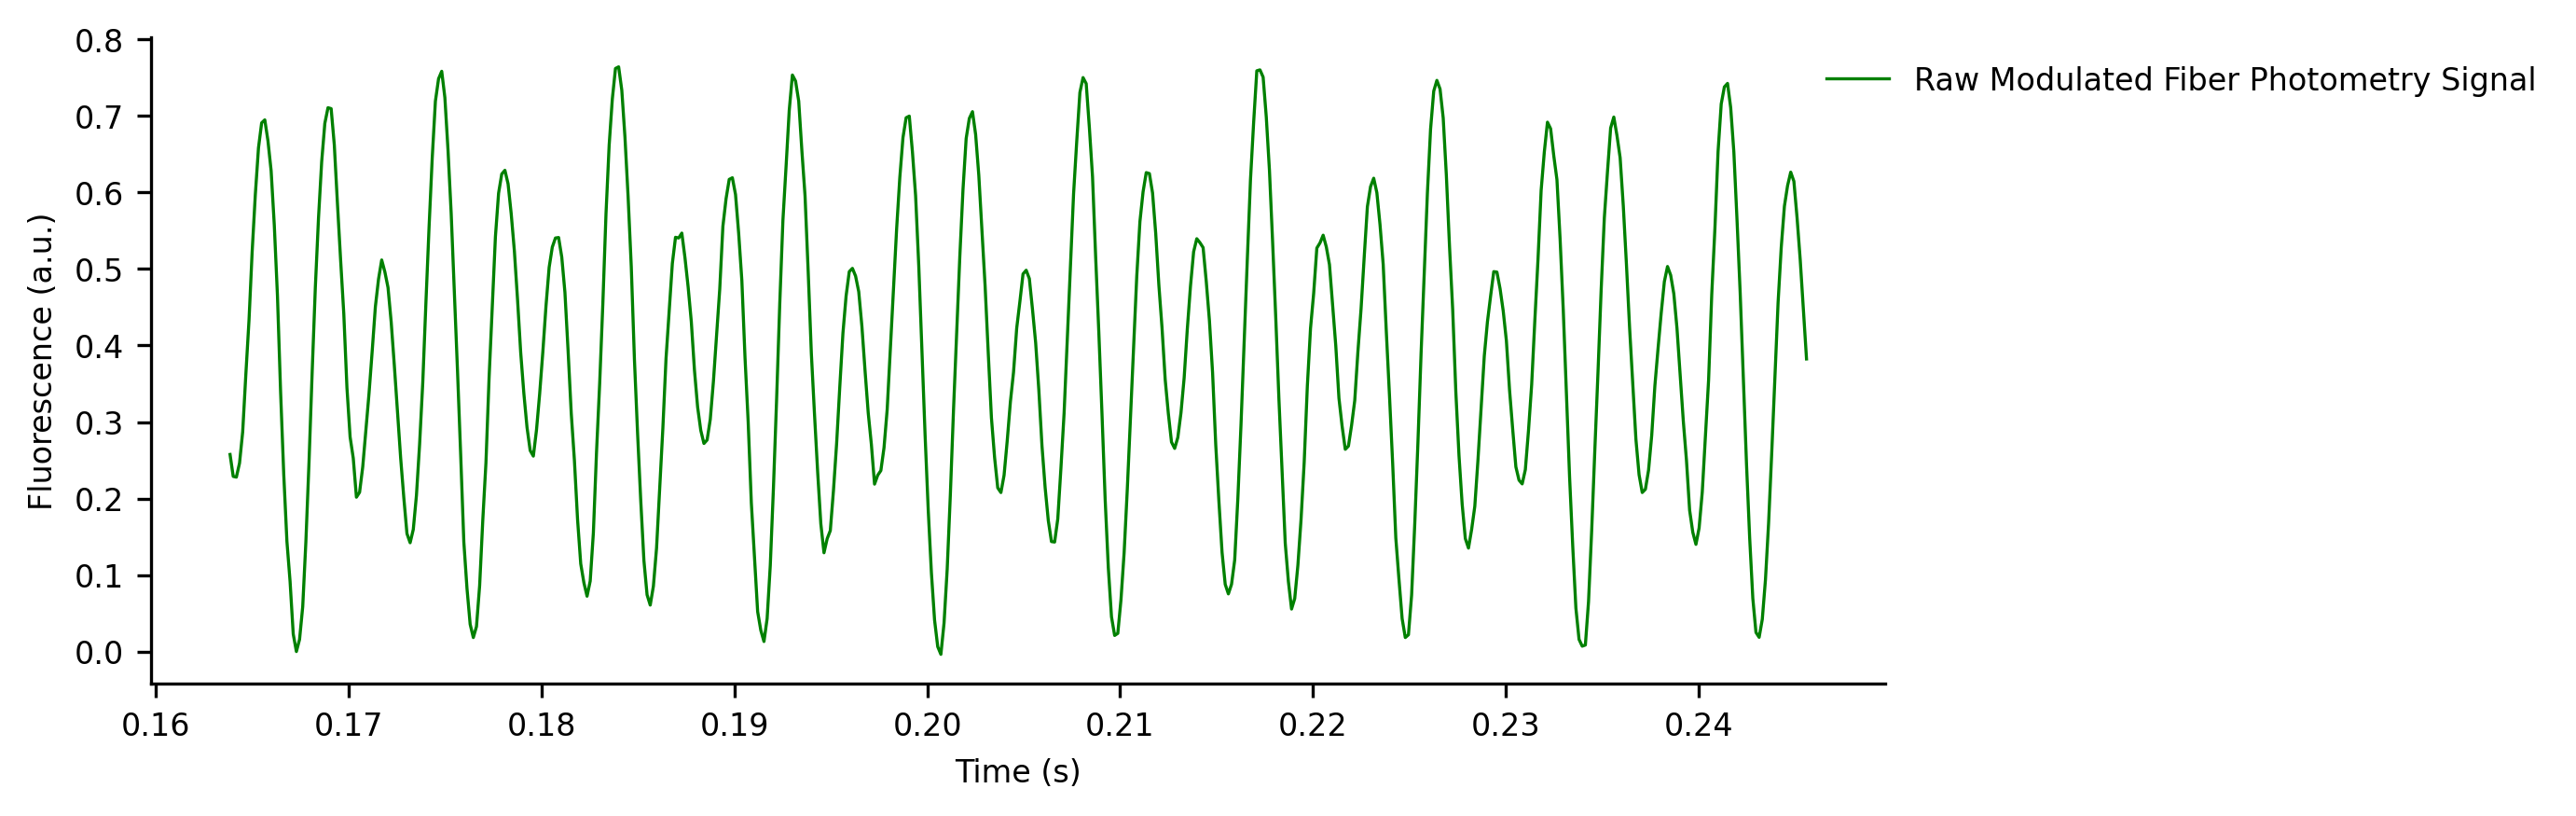

In [10]:
import numpy as np
from matplotlib import pyplot as plt

# Define your window (start and end indices)
start_idx = 1000
end_idx = 1500

# Get the data and timestamps properly
data = np.array(fiber_photometry_response_series.data[start_idx:end_idx])
timestamps = fiber_photometry_response_series.get_timestamps()[start_idx:end_idx]

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 3), dpi=300)

# Plot the raw fluorescence
ax.plot(timestamps, data, color="green", linewidth=0.8, label='Raw Modulated Fiber Photometry Signal')

# Style the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax.tick_params(axis='both', labelsize=8)

plt.xlabel('Time (s)', fontsize=8)
plt.ylabel('Fluorescence (a.u.)', fontsize=8)

plt.show()


## Raw Modulated Fiber Photometry metadata 
The fiber photometry metadata includes the type of indicator(s), optical fiber(s), excitation source(s), photodector(s), dichroic mirror(s), and optical filter(s) that were used to construct a single fluorescence signal.

The metadata is stored in a `FiberPhotometryTable` object using [`ndx-fiber-photometry`](https://github.com/catalystneuro/ndx-fiber-photometry) and is added to `nwbfile.lab_meta_data`. It can be accessed as `nwbfile.lab_meta_data["FiberPhotometry"].fiber_photometry_table`.

In [14]:
fiber_photometry_table_region = nwbfile.lab_meta_data["fiber_photometry"].fiber_photometry_table[:]
fiber_photometry_table_region

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,coordinates
id,,,,,,,
0,SNr,Gcamp6f abc.Indicator at 0x6075227632\nFields:...,optical_fiber abc.OpticalFiber at 0x6074929056...,excitation_source abc.ExcitationSource at 0x60...,photodetector abc.Photodetector at 0x607528107...,dichroic_mirror abc.DichroicMirror at 0x607527...,"[-3.3, 1.4, -4.4]"
1,SNr,Gcamp6f abc.Indicator at 0x6075227632\nFields:...,optical_fiber abc.OpticalFiber at 0x6074929056...,excitation_source_isosbestic abc.ExcitationSou...,photodetector abc.Photodetector at 0x607528107...,dichroic_mirror abc.DichroicMirror at 0x607527...,"[-3.3, 1.4, -4.4]"


The metadata on the optical fiber used to record the GCaMP fluorescence is added to `nwbfile.devices` and can be accessed as `nwbfile.devices["Fiber1"]` or can be accessed from the referenced optical fiber in the `fiber_photometry_table_region` of the `FiberPhotometryResponseSeries`.

In [15]:
fiber_photometry_table_region["optical_fiber"][0]

optical_fiber abc.OpticalFiber at 0x6074929056
Fields:
  core_diameter_in_um: 400.0
  description: Chronically implantable optic fiber (RWD) with 400 um core, 0.39 NA, was implanted in SNr (AP -3.3, ML 1.4, DV -4.40), which served for optogenetic stimulation and photometry recordings.
  manufacturer: RWD
  numerical_aperture: 0.39

In [16]:
fiber_photometry_table_region["indicator"][0]

Data type,float64
Shape,"(3,)"
Array size,24.00 bytes


In [17]:
fiber_photometry_table_region["excitation_source"][0]

excitation_source abc.ExcitationSource at 0x6075280544
Fields:
  description: The excitation wavelength for Gcamp6f indicator.
  excitation_wavelength_in_nm: 465.0
  illumination_type: LED
  manufacturer: TDT LUX LED

In [18]:
fiber_photometry_table_region["photodetector"][0]

photodetector abc.Photodetector at 0x6075281072
Fields:
  detected_wavelength_in_nm: 470.0
  detector_type: photosensors
  manufacturer: TDT LUX Photosensors

In [19]:
fiber_photometry_table_region["dichroic_mirror"][0]

dichroic_mirror abc.DichroicMirror at 0x6075279152
Fields:
  manufacturer: Doric Lenses

In [22]:
fiber_photometry_table_region["excitation_source"][0]

excitation_source abc.ExcitationSource at 0x6075280544
Fields:
  description: The excitation wavelength for Gcamp6f indicator.
  excitation_wavelength_in_nm: 465.0
  illumination_type: LED
  manufacturer: TDT LUX LED

# Access Optogenetic Stimulation Data <a name="access-ttls"></a>

This section demonstrates how to access the optogenetic stimulation events recorded during the experiment.

In NWB format, externally generated stimuli such as laser pulses are typically stored as TimeSeries objects within the nwbfile.stimulus group. These signals capture event timing and are often recorded as TTL pulses synchronized with the acquisition system.

In this dataset, optogenetic stimulation was applied using TTL signals with varying frequencies (5 Hz, 10 Hz, 20 Hz, 40 Hz) and durations (250 ms, 1 s, 4 s), across multiple trials. The TTL events are used to align stimulation timing with fluorescence recordings for downstream analysis.

The optogenetic TTL timestamps can be accessed as:

In [34]:
optogenetic_stimulus_interval = nwbfile.stimulus["optogenetic_stimulus_interval"]
optogenetic_stimulus_interval

,start_time,stop_time,stimulus_frequency,stream_name,timeseries
id,,,,,
0,74.955981,75.206001,10.0,H10_,"[(5997, 20, optogenetic_series pynwb.ogen.OptogeneticSeries at 0x6074925120\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (139819,), type ""<f8"">\n description: The reconstructed timeseries for the optogenetic stimulation.\n interval: 1\n offset: 0.0\n resolution: -1.0\n site: optogenetic_stimulus_site pynwb.ogen.OptogeneticStimulusSite at 0x6074927808\nFields:\n description: The site where the optogenetic stimulation was applied.\n device: optical_fiber abc.OpticalFiber at 0x6074929056\nFields:\n core_diameter_in_um: 400.0\n description: Chronically implantable optic fiber (RWD) with 400 um core, 0.39 NA, was implanted in SNr (AP -3.3, ML 1.4, DV -4.40), which served for optogenetic stimulation and photometry recordings.\n manufacturer: RWD\n numerical_aperture: 0.39\n\n excitation_lambda: 635.0\n location: PPN\n\n timestamps: <HDF5 dataset ""timestamps"": shape (139819,), type ""<f8"">\n timestamps_unit: seconds\n unit: watts\n)]"
1,155.955200,156.204728,10.0,H10_,"[(12477, 20, optogenetic_series pynwb.ogen.OptogeneticSeries at 0x6074925120\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (139819,), type ""<f8"">\n description: The reconstructed timeseries for the optogenetic stimulation.\n interval: 1\n offset: 0.0\n resolution: -1.0\n site: optogenetic_stimulus_site pynwb.ogen.OptogeneticStimulusSite at 0x6074927808\nFields:\n description: The site where the optogenetic stimulation was applied.\n device: optical_fiber abc.OpticalFiber at 0x6074929056\nFields:\n core_diameter_in_um: 400.0\n description: Chronically implantable optic fiber (RWD) with 400 um core, 0.39 NA, was implanted in SNr (AP -3.3, ML 1.4, DV -4.40), which served for optogenetic stimulation and photometry recordings.\n manufacturer: RWD\n numerical_aperture: 0.39\n\n excitation_lambda: 635.0\n location: PPN\n\n timestamps: <HDF5 dataset ""timestamps"": shape (139819,), type ""<f8"">\n timestamps_unit: seconds\n unit: watts\n)]"
2,236.954092,237.203620,10.0,H10_,"[(18957, 20, optogenetic_series pynwb.ogen.OptogeneticSeries at 0x6074925120\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (139819,), type ""<f8"">\n description: The reconstructed timeseries for the optogenetic stimulation.\n interval: 1\n offset: 0.0\n resolution: -1.0\n site: optogenetic_stimulus_site pynwb.ogen.OptogeneticStimulusSite at 0x6074927808\nFields:\n description: The site where the optogenetic stimulation was applied.\n device: optical_fiber abc.OpticalFiber at 0x6074929056\nFields:\n core_diameter_in_um: 400.0\n description: Chronically implantable optic fiber (RWD) with 400 um core, 0.39 NA, was implanted in SNr (AP -3.3, ML 1.4, DV -4.40), which served for optogenetic stimulation and photometry recordings.\n manufacturer: RWD\n numerical_aperture: 0.39\n\n excitation_lambda: 635.0\n location: PPN\n\n timestamps: <HDF5 dataset ""timestamps"": shape (139819,), type ""<f8"">\n timestamps_unit: seconds\n unit: watts\n)]"
3,318.003446,318.254612,10.0,H10_,"[(25441, 20, optogenetic_series pynwb.ogen.OptogeneticSeries at 0x6074925120\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (139819,), type ""<f8"">\n description: The reconstructed timeseries for the optogenetic stimulation.\n interval: 1\n offset: 0.0\n resolution: -1.0\n site: optogenetic_stimulus_site pynwb.ogen.OptogeneticStimulusSite at 0x6074927808\nFields:\n description: The site where the optogenetic stimulation was applied.\n device: optical_fiber abc.OpticalFiber at 0x6074929056\nFields:\n core_diameter_in_um: 400.0\n description: Chronically implantable optic fiber (RWD) with 400 um core, 0.39 NA, was implanted in SNr (AP -3.3, ML 1.4, DV -4.40), which served for optogenetic stimulation and photometry recordings.\n manufacturer: RWD\n numerical_apertu

In [35]:

optogenetic_stimulus_interval.to_dataframe().head(5)

,start_time,stop_time,stimulus_frequency,stream_name,timeseries
id,,,,,
0,74.955981,75.206001,10.0,H10_,"[(5997, 20, optogenetic_series pynwb.ogen.Opto..."
1,155.955200,156.204728,10.0,H10_,"[(12477, 20, optogenetic_series pynwb.ogen.Opt..."
2,236.954092,237.203620,10.0,H10_,"[(18957, 20, optogenetic_series pynwb.ogen.Opt..."
3,318.003446,318.254612,10.0,H10_,"[(25441, 20, optogenetic_series pynwb.ogen.Opt..."
4,399.003320,399.253012,10.0,H10_,"[(31921, 20, optogenetic_series pynwb.ogen.Opt..."


In [36]:
optogenetic_series = nwbfile.stimulus["optogenetic_series"]
optogenetic_series.data

<HDF5 dataset "data": shape (139819,), type "<f8">

In [38]:
optogenetic_series

Data type,float64
Shape,"(139819,)"
Array size,1.07 MiB
Chunk shape,"(139819,)"
Compression,gzip
Compression opts,4
Compression ratio,593.0816542948038
Data type,float64
Shape,"(139819,)"
Array size,1.07 MiB
Chunk shape,"(139819,)"


In [39]:
data = optogenetic_series.data[:]
timestamps = optogenetic_series.timestamps[:]

print(f"Data shape: {data.shape}")
print(f"Timestamps shape: {timestamps.shape}")
print(f"Duration: {timestamps[-1] - timestamps[0]:.2f} seconds")

Data shape: (139819,)
Timestamps shape: (139819,)
Duration: 1747.73 seconds


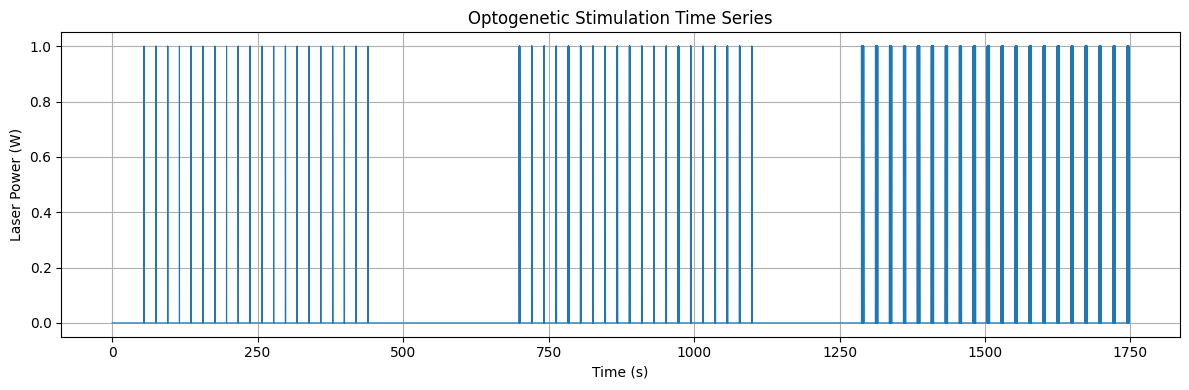

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(timestamps, data, lw=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Laser Power (W)")
plt.title("Optogenetic Stimulation Time Series")
plt.grid(True)
plt.tight_layout()
plt.show()


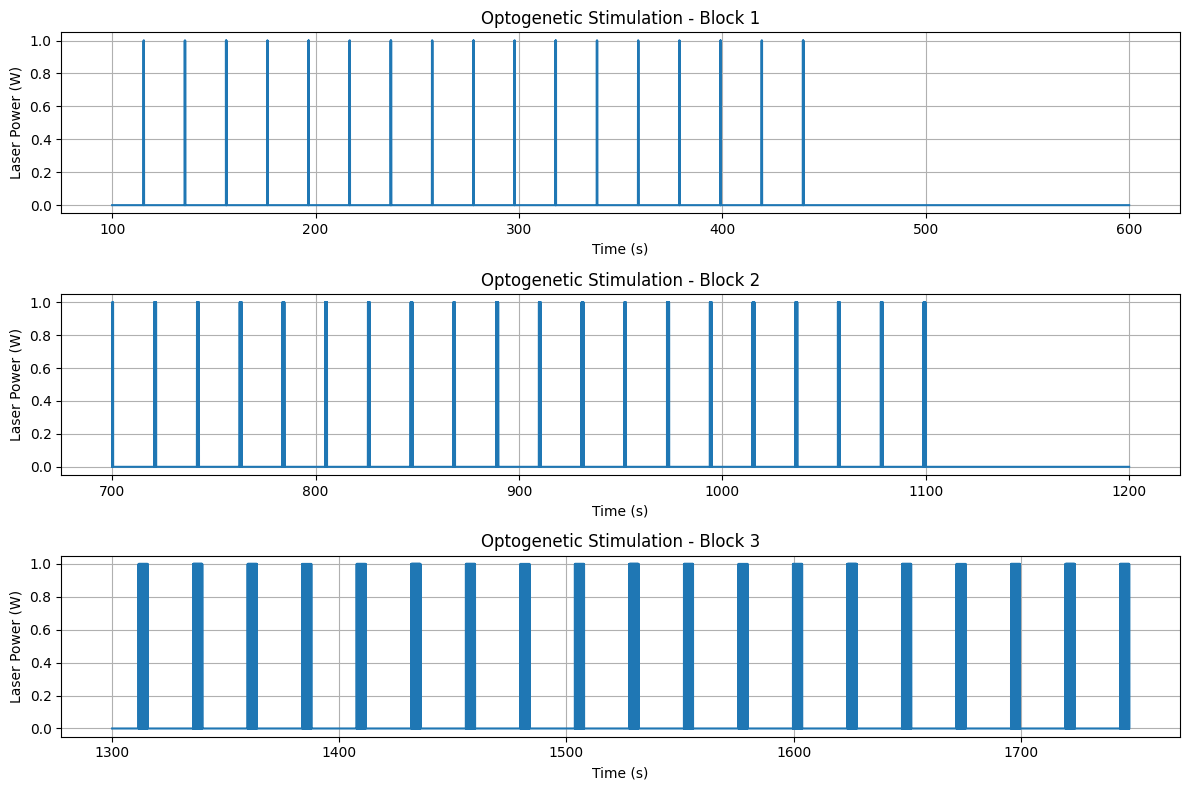

In [ ]:
# Define manual time windows 
block_windows = [
    (100, 600),   # Block 1
    (700, 1200),  # Block 2
    (1300, 1750)  # Block 3
]

# Plot each block
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharey=True)

for i, (start, end) in enumerate(block_windows):
    mask = (timestamps >= start) & (timestamps <= end)
    axes[i].plot(timestamps[mask], data[mask])
    axes[i].set_title(f"Optogenetic Stimulation - Block {i+1}")
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Laser Power (W)")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Access Behavioral Videos <a name="access-behavior"></a>


# Access Histology Images <a name="access-histology"></a>

# Accessing the Demodulated Fiber Photometry Response Data <a name="access-demod"></a>

The demodulated fluorescence signals from fiber photometry recordings are stored in `nwbfile.processing["ophys"]`.

## Demodulated Fiber Photometry Signals

In NWB, the [`FiberPhotometryResponseSeries`](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.FiberPhotometryResponseSeries) class is used to store time-varying fluorescence signals from one or more optical channels, such as calcium-dependent (e.g., 465 nm) and isosbestic control (e.g., 405 nm) signals.

We can access the demodulated fiber photometry data for each channel using:

In [48]:
nwbfile.processing["ophys"]["calcium_signal"]
nwbfile.processing["ophys"]["isosbestic_signal"]

isosbestic_signal abc.FiberPhotometryResponseSeries at 0x6074925984
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (11475456,), type "<f8">
  description: The demodulated fiber photometry signal from Tucker David Technologies (TDT) acquisition system.
  fiber_photometry_table_region: fiber_photometry_table_region <class 'hdmf.common.table.DynamicTableRegion'>
  offset: 0.0
  rate: 6103.515625
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: a.u.

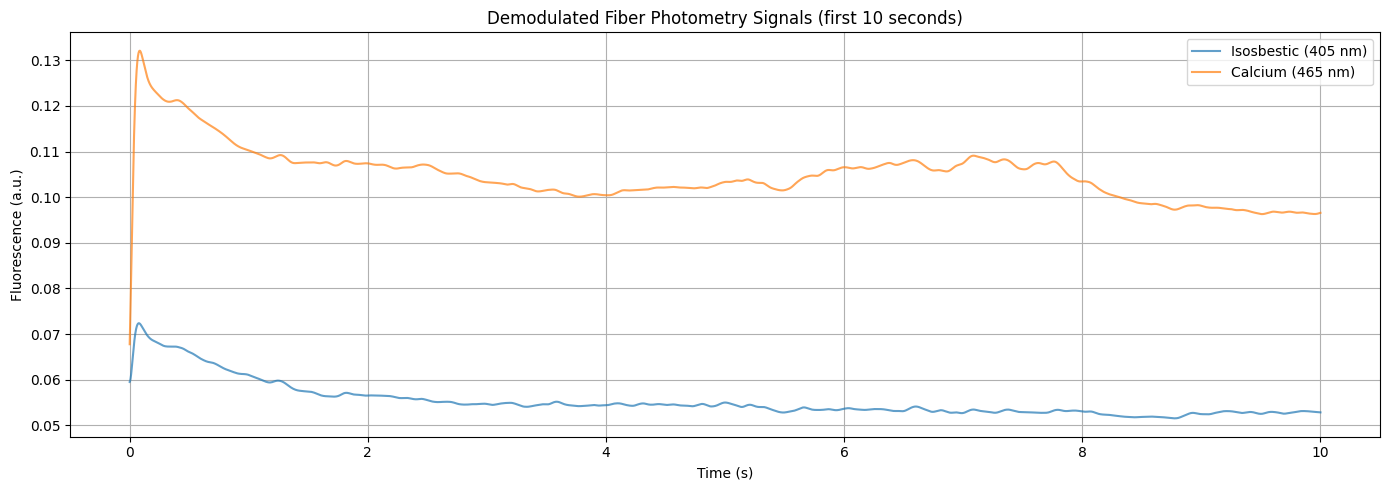

In [ ]:
# Access both signals
module = nwbfile.processing["ophys"]
isosbestic = module["isosbestic_signal"]
calcium = module["calcium_signal"] 

# Extract data and sampling info
rate = isosbestic.rate
start_time = isosbestic.starting_time

# Load data
isosb_data = isosbestic.data[:]
calcium_data = calcium.data[:]

# Build timestamps (assume both have the same sampling rate and start time)
timestamps = start_time + np.arange(isosbestic.data.shape[0]) / rate

# Select a 10-second window
duration = 10  # seconds
samples = int(duration * rate)

# Plot both signals
plt.figure(figsize=(14, 5))
plt.plot(timestamps[:samples], isosb_data[:samples], label="Isosbestic (405 nm)", alpha=0.7)
plt.plot(timestamps[:samples], calcium_data[:samples], label="Calcium (465 nm)", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (a.u.)")
plt.title("Demodulated Fiber Photometry Signals (first 10 seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Demodulated Fiber Photometry metadas

In [66]:
# Access the isosbestic signal object
isosbestic = nwbfile.processing["ophys"]["isosbestic_signal"]
table = isosbestic.fiber_photometry_table_region

table.to_dataframe()

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,coordinates
id,,,,,,,
1,SNr,Gcamp6f abc.Indicator at 0x6075227632\nFields:...,optical_fiber abc.OpticalFiber at 0x6074929056...,excitation_source_isosbestic abc.ExcitationSou...,photodetector abc.Photodetector at 0x607528107...,dichroic_mirror abc.DichroicMirror at 0x607527...,"[-3.3, 1.4, -4.4]"
